In [56]:
# Importing all related packages 
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
plt.rcParams["figure.figsize"] =(12,10)

In [5]:
# import csv file and assign to kickstarter_raw
kickstarter_raw = pd.read_csv('ks-projects-201801.csv', parse_dates = [0])

In [6]:
# get information for the data set. 
print(kickstarter_raw.info())
print(kickstarter_raw.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null object
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(1), object(9)
memory usage: 43.3+ MB
None
           ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Ear

In [7]:
#Drop duplicates
kickstarter_raw = kickstarter_raw.drop_duplicates()

In [8]:
#Convert deadline and launched from object to datetime type
kickstarter_raw['deadline']= pd.to_datetime(kickstarter_raw['deadline'])
kickstarter_raw['launched']= pd.to_datetime(kickstarter_raw['launched'])

In [9]:
#Convert category, main_category, state, country and currency to categorical type
kickstarter_raw['category'] = kickstarter_raw['category'].astype('category')
kickstarter_raw['main_category']=kickstarter_raw['main_category'].astype('category')
# kickstarter_raw['state'] = kickstarter_raw['state'].astype('category')
kickstarter_raw['currency'] = kickstarter_raw['currency'].astype('category')
kickstarter_raw['country'] = kickstarter_raw['country'].astype('category')

In [10]:
# count # of project of each country
kickstarter_raw.country.value_counts(dropna=False)

US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64

In [11]:
# find out the rows with country name = N0"

kickstarter_raw.loc[kickstarter_raw['country'] == 'N,0"']

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
169,1000694855,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20,6500.0,2014-08-06 21:28:36,555.00,undefined,0,"N,0""",NaN,555.00,6500.00
328,100149523,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,4500.0,2015-08-04 12:05:17,4767.00,undefined,0,"N,0""",NaN,3402.08,3211.53
632,1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,3500.0,2015-03-10 20:06:13,3576.00,undefined,0,"N,0""",NaN,3576.00,3500.00
647,1003130892,Butter Side Down Debut Album,Music,Music,USD,2015-11-26,6000.0,2015-11-02 22:09:19,7007.80,undefined,0,"N,0""",NaN,7007.80,6000.00
749,1003629045,Chase Goehring debut EP,Music,Music,USD,2016-03-21,3000.0,2016-02-23 03:09:49,3660.38,undefined,0,"N,0""",NaN,3660.38,3000.00
824,1004013077,Spencer Capier Instrumental Project 2015,Music,Music,CAD,2014-10-10,4000.0,2014-09-10 22:51:01,4760.00,undefined,0,"N,0""",NaN,4251.14,3572.39
844,1004126342,LUKAS LIGETI'S 50TH BIRTHDAY FESTIVAL: ORIGINA...,Music,Music,USD,2015-06-11,5000.0,2015-05-15 02:12:35,6370.00,undefined,0,"N,0""",NaN,6370.00,5000.00
864,1004255433,The Battle For Breukelen: A Neighborhood Epic,Film & Video,Film & Video,USD,2015-11-07,6000.0,2015-10-10 18:45:24,6695.00,undefined,0,"N,0""",NaN,6695.00,6000.00
870,1004298993,"""Tamboura Plays Violin"" - a collection of Pop ...",Music,Music,USD,2015-03-28,2750.0,2015-02-11 19:28:27,2926.00,undefined,0,"N,0""",NaN,2926.00,2750.00
890,1004402863,Nightingale Noel - An A Cappella Holiday CD,Music,Music,USD,2015-12-11,1200.0,2015-11-11 21:02:55,1585.00,undefined,0,"N,0""",NaN,1585.00,1200.00


In [12]:
# remove rows with NaN values
kickstarter_clean = kickstarter_raw.dropna()
kickstarter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374860 entries, 0 to 378660
Data columns (total 15 columns):
ID                  374860 non-null object
name                374860 non-null object
category            374860 non-null category
main_category       374860 non-null category
currency            374860 non-null category
deadline            374860 non-null datetime64[ns]
goal                374860 non-null float64
launched            374860 non-null datetime64[ns]
pledged             374860 non-null float64
state               374860 non-null object
backers             374860 non-null int64
country             374860 non-null category
usd pledged         374860 non-null float64
usd_pledged_real    374860 non-null float64
usd_goal_real       374860 non-null float64
dtypes: category(4), datetime64[ns](2), float64(5), int64(1), object(3)
memory usage: 36.1+ MB


In [13]:
# count # of project of each main_category
kickstarter_clean.main_category.value_counts(dropna=False)

Film & Video    62696
Music           49530
Publishing      39379
Games           35225
Technology      32562
Design          30066
Art             28152
Food            24599
Fashion         22812
Theater         10912
Comics          10819
Photography     10778
Crafts           8809
Journalism       4754
Dance            3767
Name: main_category, dtype: int64

In [14]:
kickstarter_clean.main_category.value_counts(dropna=False).count()

15

In [15]:
kickstarter_clean.main_category.count()

374860

In [16]:
kickstarter_clean.main_category.value_counts().head(6).sum()

249458

In [17]:
# count # of project for each state
kickstarter_clean.state.value_counts()

failed        197611
successful    133851
canceled       38757
live            2798
suspended       1843
Name: state, dtype: int64

In [18]:
# Statistics summary of the numerical data 
kickstarter_clean.describe()

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.748600e+05,3.748600e+05,374860.000000,3.748600e+05,3.748600e+05,3.748600e+05
mean,4.952299e+04,9.750538e+03,106.688366,7.036802e+03,9.120899e+03,4.586303e+04
std,1.189362e+06,9.601094e+04,911.710124,7.864016e+04,9.131969e+04,1.158767e+06
min,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,2.000000e+03,3.100000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,5.500000e+03,6.200000e+02,12.000000,3.947650e+02,6.244950e+02,5.500000e+03
75%,1.650000e+04,4.080000e+03,57.000000,3.034425e+03,4.050895e+03,1.600000e+04
max,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [19]:
# Count the number of None in each column 
kickstarter_clean.isna().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [20]:
# Pivoting Data set 
kickstarter_clean.pivot_table(index = 'country', columns = 'state', values = 'pledged',aggfunc='sum')

state,canceled,failed,live,successful,suspended
country,,,,,
AT,316967.00,5.319190e+05,120405.00,7.521381e+06,8914.88
AU,2954351.45,6.746694e+06,332909.04,4.793126e+07,1381152.71
BE,64747.03,3.203058e+05,7026.00,3.339856e+06,16459.00
CA,5144684.35,1.125717e+07,1308526.20,9.490469e+07,739892.50
CH,371134.40,1.096193e+06,226167.00,1.110965e+07,52870.77
DE,1515229.08,3.226136e+06,190552.84,3.004128e+07,605484.00
DK,2347522.97,3.796668e+06,133072.70,4.356007e+07,471623.50
ES,794256.40,1.371223e+06,201559.00,9.116659e+06,75364.00
FR,951676.33,2.179976e+06,346438.87,2.724780e+07,49587.00


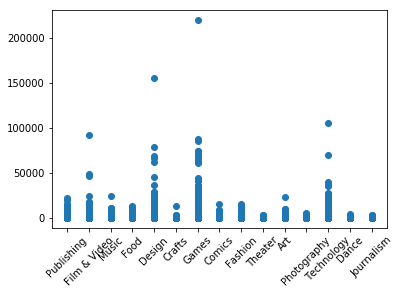

In [21]:
# Scatter plot of main_category vs # of backers
plt.scatter(x='main_category', y = 'backers', data = kickstarter_clean)
plt.xticks(rotation=45)
plt.show()

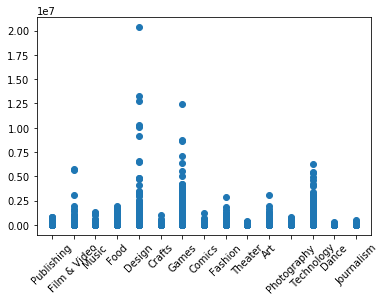

In [22]:
# Scatter plot of main_category vs # of backers
plt.scatter(x='main_category', y = 'pledged', data = kickstarter_clean)
plt.xticks(rotation=45)
plt.show()

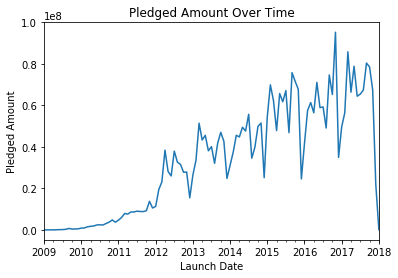

In [23]:
kickstarter2 = kickstarter_clean
kickstarter2.index = kickstarter2['launched']
ax= kickstarter2['pledged'].resample('M').sum().plot(title = 'Pledged Amount Over Time')
ax.set_xlim([datetime.date(2009, 1, 1), datetime.date(2018, 1, 31)])
plt.ylabel('Pledged Amount')
plt.xlabel('Launch Date')
plt.show()

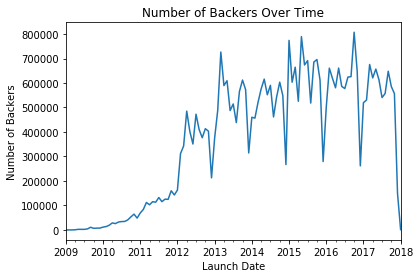

In [24]:
ay= kickstarter2['backers'].resample('M').sum().plot(title = 'Number of Backers Over Time')
ay.set_xlim([datetime.date(2009, 1, 1), datetime.date(2018, 1, 31)])
plt.ylabel('Number of Backers')
plt.xlabel('Launch Date')
plt.show()

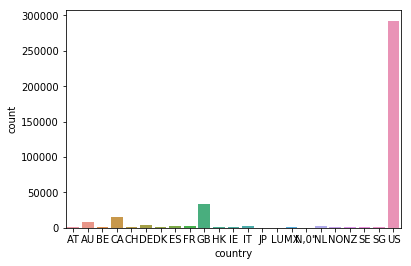

In [25]:
ab= sns.countplot(x='country',data=kickstarter_clean)
plt.show()

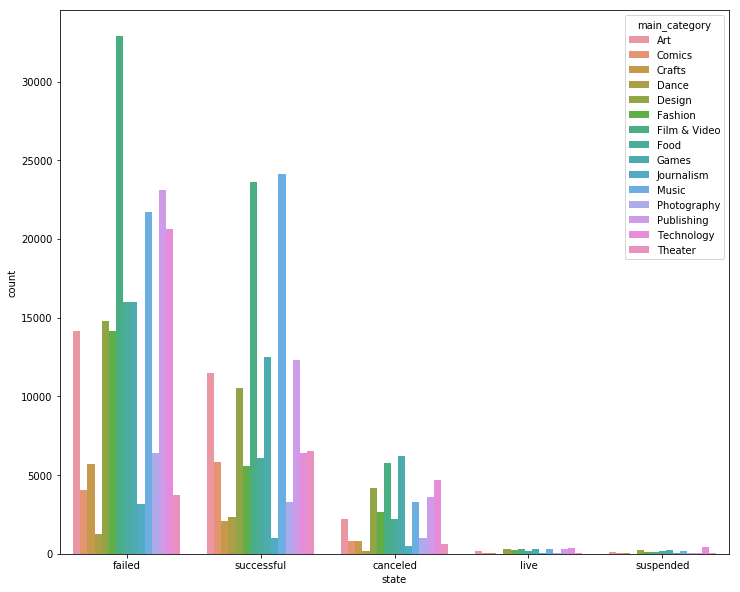

In [57]:
# Count the number of different project states
ac = sns.countplot(x='state', hue = 'main_category', data = kickstarter_clean, order = kickstarter_clean['state'].value_counts().index)


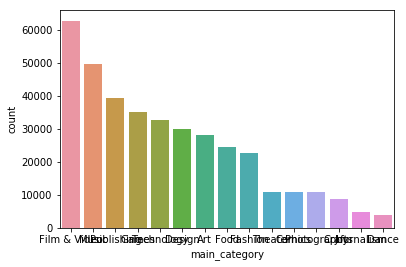

In [27]:
ac = sns.countplot(x='main_category', data = kickstarter_clean, order = kickstarter_clean['main_category'].value_counts().index)

In [28]:
# check to see if anymore missing values
assert kickstarter_clean.name.notnull().all()


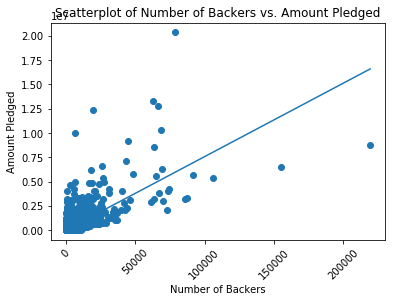

In [29]:
plt.scatter(x='backers', y = 'pledged', data = kickstarter_clean)
plt.xticks(rotation=45)
slope, intercept = np.polyfit(kickstarter_clean.backers, kickstarter_clean.pledged, 1)

x = np.array([0, max(kickstarter_clean.backers)])
y = slope * x + intercept

plt.plot(x, y)

plt.xlabel('Number of Backers')
plt.ylabel('Amount Pledged')
plt.title('Scatterplot of Number of Backers vs. Amount Pledged')

plt.show()

In [30]:
# Find correlation between two numerical variables pledged and backers.
pledged_amount = kickstarter2['pledged']
backers = kickstarter2['backers']
# Calculate the Pearson Correlation Coefficient and its p-value
statistics_result = scipy.stats.pearsonr(pledged_amount, backers)
print('The Pearson Correlation Coefficient is: ', statistics_result[0])
print('The p-value is: ', statistics_result[1])


The Pearson Correlation Coefficient is:  0.7178584514187824
The p-value is:  0.0


In [31]:
#import required module
from scipy.stats import chi2_contingency

# define a function to calculate the Chi-square statistics
def chisq_of_df_cols(df, c1, c2):
    groupsizes = df.groupby([c1, c2]).size()
    ctsum = groupsizes.unstack(c1)
    # fillna(0) is necessary to remove any NAs which will cause exceptions
    return(chi2_contingency(ctsum.fillna(0)))
# apply function to state and main_category
chisq_result = chisq_of_df_cols(kickstarter2, 'state', 'main_category')
print('Chi-Square Test value: ', chisq_result[0])
print('p-value: ', chisq_result[1])
print('Degree of Freedom: ', chisq_result[2])

Chi-Square Test value:  21526.469859728186
p-value:  0.0
Degree of Freedom:  56


In [32]:
# apply function to state and country
chisq_result1 = chisq_of_df_cols(kickstarter2, 'state', 'country')
np.set_printoptions(suppress=True)
print('Chi-Square Test value: ', chisq_result1[0])
print('p-value: ', chisq_result1[1])
print('Degree of Freedom: ', chisq_result1[2])
print('Expected frequencies: ', chisq_result1[3])


Chi-Square Test value:  5089.318159226757
p-value:  0.0
Degree of Freedom:  84
Expected frequencies:  [[    61.7241877     314.7142053       4.4560796     213.17037561
       2.93515179]
 [   810.47890679   4132.40310783     58.51123619   2799.06628875
      38.54046044]
 [    63.79199968    325.25739476      4.605362      220.31176172
       3.03348183]
 [  1525.63168116   7778.76518167    110.14055381   5268.91467748
      72.54790588]
 [    78.68024596    401.16835885      5.68019527    271.72974177
       3.74145814]
 [   431.24218908   2198.78216134     31.13284426   1489.3360748
      20.50673051]
 [   115.07373686    586.7284933       8.30756549    397.41813744
       5.4720669 ]
 [   235.31700368   1199.81496025     16.98833698    812.68974017
      11.18995892]
 [   303.86497092   1549.32169076     21.9370485    1049.42668996
      14.44959985]
 [  3481.26486422  17749.986611      251.32438244  12022.88059809
     165.54354426]
 [    63.89539028    325.78455423      4.61282612

In [51]:
from sklearn.model_selection import train_test_split


X = kickstarter_clean[['goal', 'pledged','backers']]

y = kickstarter_clean.state

#get Standard Scaler and assign it to sc


# Split the dataset into Training and Test set, test set = 40% of the data, 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 21)

# Split the test set into final test set and validation set. 50% each

X_test_final, X_valid, y_test_final, y_valid = train_test_split(X_test, y_test, test_size = 0.5, random_state = 21)




In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

grid={"C":[500]}
    
# Apply logistic regression model to training data
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, grid, cv=10)
logreg_cv.fit(X_train,y_train)

print('The accuracy : ', logreg_cv.best_score_)


    
    

C:\Users\yunin\Anaconda2\envs\Python 3.6\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yunin\Anaconda2\envs\Python 3.6\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\yunin\Anaconda2\envs\Python 3.6\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\yunin\Anaconda2\envs\Python 3.6\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yunin\Anaconda2\envs\Python 3.6\lib\site-packages\sklearn\linear_model

The accuracy :  0.8722634227889523


C:\Users\yunin\Anaconda2\envs\Python 3.6\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [73]:
# predict using Test set
y_pred= logreg_cv.predict(X_test_final)

In [74]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_final, y_pred))

[[    1  7405     0   292     0]
 [    3 38726     0   845     0]
 [    2   487     0   103     0]
 [    0     0     0 26745     0]
 [    0   274     0    89     0]]


In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test_final, y_pred))

C:\Users\yunin\Anaconda2\envs\Python 3.6\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yunin\Anaconda2\envs\Python 3.6\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

    canceled       0.33      0.00      0.00      7698
      failed       0.83      0.98      0.90     39574
        live       0.00      0.00      0.00       592
  successful       0.95      1.00      0.98     26745
   suspended       0.00      0.00      0.00       363

   micro avg       0.87      0.87      0.87     74972
   macro avg       0.42      0.40      0.37     74972
weighted avg       0.81      0.87      0.82     74972



C:\Users\yunin\Anaconda2\envs\Python 3.6\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [54]:
# Predict the Validation Data Set
y_pred_val= logreg_cv.predict(X_valid)
print ('The Accuracy Score for validation set ', logreg_cv.score(X_valid, y_valid) )

The Accuracy Score for validation set  0.8716053993490903


In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, y_pred_val))

C:\Users\yunin\Anaconda2\envs\Python 3.6\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yunin\Anaconda2\envs\Python 3.6\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

    canceled       0.40      0.00      0.00      7863
      failed       0.82      0.98      0.89     39405
        live       0.00      0.00      0.00       544
  successful       0.95      1.00      0.98     26814
   suspended       0.00      0.00      0.00       346

   micro avg       0.87      0.87      0.87     74972
   macro avg       0.44      0.40      0.37     74972
weighted avg       0.82      0.87      0.82     74972



C:\Users\yunin\Anaconda2\envs\Python 3.6\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [36]:
#Knn 
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test_final)
print ('The Accuracy Score: ', knn.score(X_test_final,y_test_final) )


The Accuracy Score:  0.8837032492130396


In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test_final, y_pred_knn))

C:\Users\yunin\Anaconda2\envs\Python 3.6\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yunin\Anaconda2\envs\Python 3.6\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

    canceled       0.00      0.00      0.00      7698
      failed       0.83      1.00      0.90     39574
        live       0.00      0.00      0.00       592
  successful       0.99      1.00      0.99     26745
   suspended       0.00      0.00      0.00       363

   micro avg       0.88      0.88      0.88     74972
   macro avg       0.36      0.40      0.38     74972
weighted avg       0.79      0.88      0.83     74972



C:\Users\yunin\Anaconda2\envs\Python 3.6\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [39]:
# Predict the Validation Data Set
y_pred_knn_val= knn.predict(X_valid)
print ('The Accuracy Score for validation set ', knn.score(X_valid, y_valid) )

The Accuracy Score for validation set  0.8819826068398869


In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, y_pred_knn_val))

C:\Users\yunin\Anaconda2\envs\Python 3.6\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yunin\Anaconda2\envs\Python 3.6\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

    canceled       0.31      0.01      0.01      7863
      failed       0.82      1.00      0.90     39405
        live       0.00      0.00      0.00       544
  successful       0.99      1.00      0.99     26814
   suspended       0.00      0.00      0.00       346

   micro avg       0.88      0.88      0.88     74972
   macro avg       0.43      0.40      0.38     74972
weighted avg       0.82      0.88      0.83     74972



C:\Users\yunin\Anaconda2\envs\Python 3.6\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [48]:
#ensemable method
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(KNeighborsClassifier(),
                            max_samples=0.9, max_features=0.9)
bagging.fit(X_train, y_train)
y_pred_bagging = bagging.predict(X_test_final)
print ('The Accuracy Score is : ', knn.score(X_test_final,y_test_final) )

The Accuracy Score is :  0.8837032492130396


In [49]:
print(classification_report(y_test_final, y_pred_bagging))

C:\Users\yunin\Anaconda2\envs\Python 3.6\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yunin\Anaconda2\envs\Python 3.6\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

    canceled       0.23      0.01      0.01      7698
      failed       0.82      0.96      0.88     39574
        live       0.00      0.00      0.00       592
  successful       0.92      0.98      0.95     26745
   suspended       0.00      0.00      0.00       363

   micro avg       0.85      0.85      0.85     74972
   macro avg       0.39      0.39      0.37     74972
weighted avg       0.78      0.85      0.80     74972



C:\Users\yunin\Anaconda2\envs\Python 3.6\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [45]:
# Predict the Validation Data Set
y_pred_bagging_val= bagging.predict(X_valid)
print ('The Accuracy Score for validation set ', bagging.score(X_valid, y_valid) )

The Accuracy Score for validation set  0.8515312383289761


In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, y_pred_bagging_val))

C:\Users\yunin\Anaconda2\envs\Python 3.6\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yunin\Anaconda2\envs\Python 3.6\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

    canceled       0.25      0.00      0.01      7863
      failed       0.81      0.96      0.88     39405
        live       0.00      0.00      0.00       544
  successful       0.92      0.98      0.95     26814
   suspended       0.00      0.00      0.00       346

   micro avg       0.85      0.85      0.85     74972
   macro avg       0.40      0.39      0.37     74972
weighted avg       0.78      0.85      0.80     74972



C:\Users\yunin\Anaconda2\envs\Python 3.6\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
